# [Title]

## 1. Introduction

In [1]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
#%matplotlib inline
import pandas as pd
from cobra.io import read_sbml_model
import escher

In [3]:
# A test from assignment 4
model = read_sbml_model('data/iML1515.xml')
escher.list_available_maps()
escher.Builder('e_coli_core.Core metabolism')

Builder()

### 1.1 Literature review of the compound (<500 words)


Applications of the product
Artemisinin, derived from the sweet wormwood Artemisia annua plant, is currently one of our most important drugs against malaria since its introduction in the early 1970s (Cui and Su, 2009 & Wang et al., 2019). With its ability to target and eliminate malaria parasites in the bloodstream, it has preserved countless lives (Weathers et al., 2014). Ongoing research continues to explore artemisinins’s potential in other medical areas including its promising anticancer properties (Augustin, Staines and Krishna, 2020).

The underlying mechanisms of artemisinin remain somewhat unclear, but studies have demonstrated that artemisinin can regulate the labile iron pool by promoting degradation of ferritin in lysosomes which induces cell death. Given that cancer cells tend to accumulate more iron than normal cells, they become notably more vulnerable to the toxic effects of artemisinin, offering a new promising approach for potential cancer treatments (Liu et al., 2022 & Ma et al., 2021).

Evaluation of market potential
It is estimated that approximately 619.000 people die from malaria each year, ranking it as the leading cause of death worldwide. According to data from Organization for Economic Co-operation and Development, the Asia pacific region alone has about 2.31 billion people at high risk of malaria infection and The World Health Organization (WHO) stated that in 2021 half of the world's population was at risk of malaria and with the ongoing climate change, the global malaria issue is expected to worsen which increases the demand for artemisinin for treatment (Artemisinin Market, exp publication date:2024 & Artemisinin Market Size, Share, Trends & Forecast by 2031, 2023 & World Health Organization: WHO and World Health Organization: WHO, 2023).

The market size of artemisinin in 2021 stood at 64 million US dollars, and by 2031 it is projected to reach 367 million US dollars with a compound annual growth rate (CAGR) of 19.1%. The WHO now advocated the use of artemisinin as first-line treatment for all causes of malaria, further boosting market growth (Artemisinin Market Size, Share, Trends & Forecast by 2031, 2023).

Furthermore, the potential for artemisinin to be used in cancer treatment, if supported by successful studies, could provide additional impetus for market expansion (Ma et al., 2021). 

# Biosynthetic pathway/gene
The biosynthesis of artemisinin is derived from the MVA pathway, occurring in the cytosol, and the MEP pathway occurring in the plastid, see figure X. Two IPP molecules derived from the MVA pathway and one DMAPP molecule derived from the MEP pathway are catalyzed by FPS to form farnesyl diphosphate. Farnesyl diphosphate is then converted to amorphine-4,11-diene from catalyzation by ADS. Via CYP, amorphine-4,11-diene is then further oxidized to artemisinic alcohol and artemisinic aldehyde. The artemisinic aldehyde can be further catalyzed by CYP and ALDh1 to form artemisinic acid or be catalyzed by DBR2 to form dihydroartemisinic aldehyde, which can be converter to dihydroartemisinic acid by Aldh1. Through photo-oxidation, dihydroartemisinic acid can be converted to artemisinin. Artemisinic acid can also be converted into artemisinin through semi-synthesis or arteannuin B via photo-oxidation. 


BILLEDE

### 1.2 Literature review of the cell factory (<500 words)

# General advantages
The idea for this project is to produce artemisinic acid, the precursor for artemisinin, in the cell factory Saccharomyces cerevisiae, which is described in detail below. S. cerevisiae, also known as budding yeast, is a powerful  model organism (Duina, Miller and Keeney, 2014). The use of this organism for biotechnological purposes dates back several thousand years. Even now it is used for a variety of different productions, these include ethanol, wine, beer and many others (Parapouli et al., 2020).  
The advantage when working with this cell factory is that it is an eukaryote; this means that it has a higher level of complexity, so the different steps in the synthesis can be compartmentalized if needed (Duina, Miller and Keeney, 2014). This organism has been studied extensively due to its value in the industry therefore a lot of pathways are already known for the organism. The organism has versatile properties such as genetic tractability, biosafety and rapid growth (Wang et al., 2021). All these advantages compels the idea that yeast is a good candidate for production of biochemicals such as artemisinic acid (Kung et al., 2018). 


# General disadvantages
All these advantages also come with their own drawbacks. The complexity of yeast may prove challenging when introducing new pathways. Another challenge is that yeast will produce unwanted ethanol due to the crabtree effect lowering the yield for other biochemicals such as artemisinic acid (Kavšček et al., 2015). 

# Suitability of the cell factory for the product 
S.ceravisae utilizes glucose as a carbon source and substrate on an industrial scale is not environmentally or economically sustainable. Alternative carbon sources must be researched to make the process more sustainable, carbon sources such as xylose which are abundant in nature could be a viable and sustainable solution (Kavšček et al., 2015). 


Artemisinic acid has been experimentally produced in S. cerevisiae with a yield of 25 g/L. Since the pathway for artemisinic acid has been introduced into yeast and yields are promising, optimization of the yield factor must be researched further. Lastly, artemisinic acid is turned into artemisinin with chemical synthesis (Paddon et al., 2013). 

An alternative cell factory could be E. coli since it is also possible to produce artemisinic acid with E. coli. The downside is that the yield of  artemisinic acid produced is significantly less compared to yeast. The yield for artemisinic acid produced by e.coli is 105 mg/l, therefore choosing yeast as the cell factory results in higher yields and thus results in a more profitable metabolic model for the company (Zhao et al., 2022).  

## 2. Problem definition (<300 words)


Artemisinin, currently produced by extracting it from the herb Artemisia annua, faces challenges such as low in vivo production and the high cost of in vitro chemical synthesis (Arsenault, Wobbe, and Weathers, 2008). Various strategies, both nontransgenic, like selective plant breeding, and transgenic, have been employed to enhance artemisinin production (Arsenault, Wobbe, and Weathers, 2008).

Additionally, there are drawbacks to using Artemisia annua due to the herbicidal and antimicrobial effects of the produced artemisinic compound, posing environmental risks. As an alternative, chemical synthesis of artemisinin is proposed, but this approach has its own disadvantages, including complex steps, high costs, and low yields (Zhao et al., 2022).

Newer approaches involve creating heterologous systems in organisms like Escherichia coli and Saccharomyces cerevisiae. These fermentation-based systems offer advantages such as scalability, cost-effectiveness, and supply flexibility (Lenihan et al., 2008; Arsenault, Wobbe, and Weathers, 2008).

Despite the reported high yields of artemisinin acid production in S. cerevisiae meeting industrial standards, reaching 25 g/ml, and achieving an overall artemisinin yield of 40-45% after four steps of chemical synthesis (Zhao et al., 2022), further improvements are needed to optimize production. To address low yields, we have decided to construct a computer-calculated model of S. cerevisiae capable of producing artemisinic acid.
 
For this purpose, we will introduce the heterologous pathway from Artemisia annua , see figure x, into a S. cerevisiae strain  in order to create an optimized strain with high product yield and titer. After the pathway has been added we will use different computational methods to determine the strain efficiency. A successful strain would mean that Artemisinin-based combination therapies (ACTs) and artemisinin-based research would become cheaper and could lead to lots of benefits (Lenihan et al., 2008 ).  


## 3.  Selection and assessment of existing GSM (<500 words)


#### Performance comparison with MEMOTE
|S.cerevisiae model|Total reactions|Total metabolites|Total compartments|Total Genes|Metabolic coverage|Total score(%)|Consistency score (%)|Annotation-metabolic score(%)|Annotation-reaction score (%)|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|iMM904| 1577 | 1226 | 8 | 905 | 1.74 | 81 | 85 | 80 | 82 |
|iND750| 1266 | 1059 | 8 | 750 | 1.69 | 81 | 85 | 80 | 83 |


Saccharomyces cerevisiae hit the milestone of being the first eukaryote whose genome was fully sequenced and annotated. The initial genome-scale metabolic (GMS) model for yeast featured two compartments and 1175 metabolic reactions. Next up, iND750 was introduced and included five more compartments. Following this, iIN800 integrated improvements with 800 genes and 1446 reactions, which culminated with the IMM904 that increased the size of iND750 to 904 genes and 1412 reactions. Using the memote analysis, see table M, to compare iMM904 and iND850  it is also apparent how well understood these organisms are. Both share a high metabolic coverage, (iND750: 1266/750=1.69 & iMM904: 1577/905=1.74), <1 indicating that multiple reactions are coupled to each gene. The sub-total scores for model consistency, metabolite annotation, and reaction annotation are adequate for conducting FBA (Flux Balance Analysis). However we chose iMM904 due to a slightly higher metabolic coverage. Furthermore the chosen iMM904 model, is an improved model of the iND750 model (Zomorrodi and Maranas, 2010). 

The iMM904 has been validated through different experiments which have been compared both the in-silico predictions, e.i. the iMM904 model, with actual lab data. These validation experiments included predicting deletion growth phenotypes by comparing lethal mutations in-silico and in vitro. They also included chemostat growth simulations, where sample measurement in vitro was compared to predicted values of iMM904 in-silico.This improved model has a more complex build and is larger than the iND750 model thus it has difficulty in predicting cell death due to the lack of information in regards to dead end metabolites. These knowledge gaps are closing over time and are therefore not a huge problem for the current model, but still worth noting when trying to predict gene knockouts (Mo, Palsson and Herrgård, 2009 & Heavner and Price, 2015). 


## 4. Computer-Aided Cell Factory Engineering (<1500 words)

<font size="5"> Indtroduction </font>

It has been noted that the precursor of artemisinin, artemisinic acid, exhibits a notably low yield when derived from inexpensive carbon sources as substrates. This poses a significant challenge as the produced quantities seldom meet the demands of the pharmaceutical market. The optimization of pathways and genes began in 2003 with Martin et al. employing a bioengineering approach in E. coli. Building on this, Tsuruta et al. further refined and enhanced the process, ultimately increasing the yield of artemisinic acid in yeast (Zhao et al., 2022). 
In this report, our focus shifts towards a computational strategy aimed at improving the yield of artemisinic acid, the crucial precursor of artemisinin.


<font size="5"> Media optimization </font>
<br>

|  | Defualt |YEPD (succrose)|
|:-:|:-:|:-:|
|Maximum Theoretical Biomass Productivity (h-1)| 0.288 | 1.307 |
|Maximum Theoretical Productivity of AA  (mmol * gDW-1 h-1)| 0.833 | 2.000 |
| Maximum Theoretical Yield (mmol-AA * mmol-carbon-1) | 0.0833 | 0.0465 |

The model’s standard media comprises the most essential nutritional elements for yeast survival, utilizing glucose as the carbon source and ammonium as one of the nitrogen sources and various minerals. However, there are alternative medias that offer a more comprehensive nutrient profile. The most prevalent rich medium for yeast is Yeast Extract Peptone Dextrose (YEPD) is the most common rich media for yeast is YEPD, containing a variety of amino acids, creating an optimal environment for yeast growth, supporting biomass production and facilitating diverse cellular processes. We added 18 amino acids present in yeast extract and adjusted the iron level to 10 mmol/gDW*h and glucose to 20 mmol/gDW*h.   

We compared the maximum theoretical biomass productivity and the maximum theoretical productivity of artemisinic acid (AA) in YEPD media with different carbon sources. 
While both sucrose and trehalose yielded comparable results, we opted for sucrose due to its lower cost. The productivity of AA was around 2 mmol * gDW-1 * h-1 for both sucrose and glucose. However, glucose exhibited a maximum theoretical biomass productivity of 0.768 h-1 whereas sucrose had a higher value of 1.307 h-1, which will therefore be our main carbon source moving forward, see Y. 

Comparing YEPD media with sucrose as carbon source to the default media using glucose, we observe a fivefold increase from default media to YEPD for maximum theoretical biomass productivity. Additionally, the maximum theoretical productivity of artemisinic acid doubles. However, there was a halving of the maximum theoretical yield from the default to YEPD.


# Phenotypic phase planes 

A direct correlation exists between the quantity of added sucrose and the resulting biomass production, as illustrated in the figure below. Analyzing the relationship between sucrose and the production of artemisinic acid, as shown below, reveals a non-linear correlation. This suggests the potential need for a fed-batch approach to sustain optimal production rates of artemisinic acid. Additionally, the plots below demonstrate that sucrose outperforms glucose in artemisinic acid production.


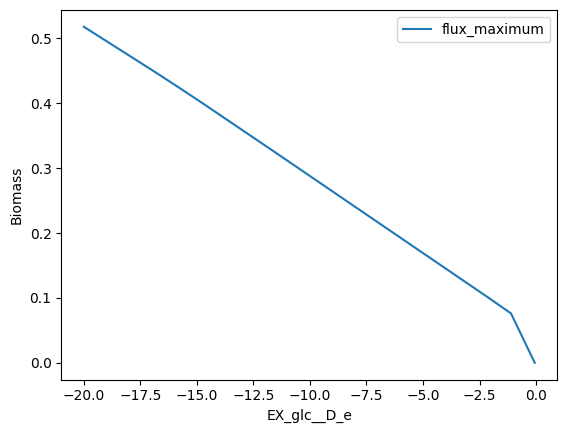

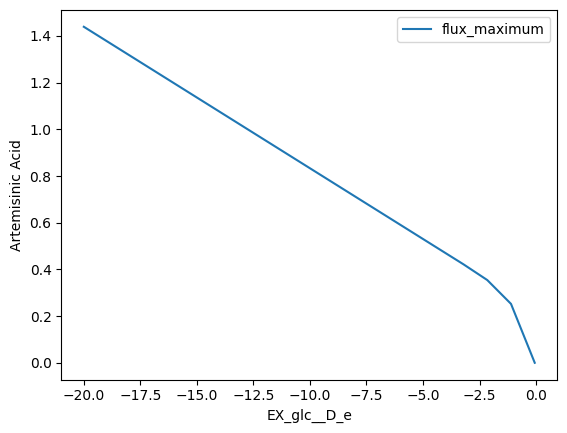

In [14]:



from PIL import Image
img1 = Image.open("Analysis/Pictures/biomass_glucose.png")
display(img1)
img2 = Image.open("Analysis\Pictures\AA_GLC.png")
display(img2)




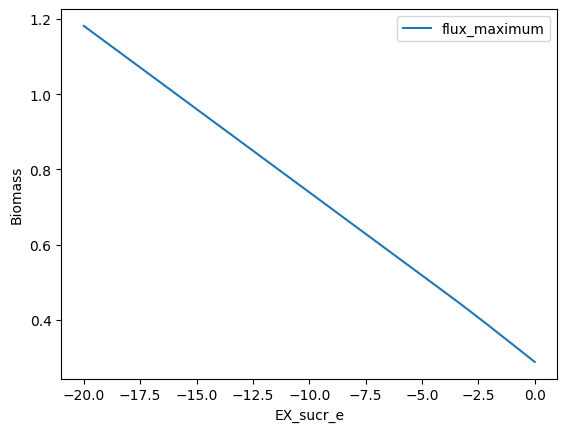

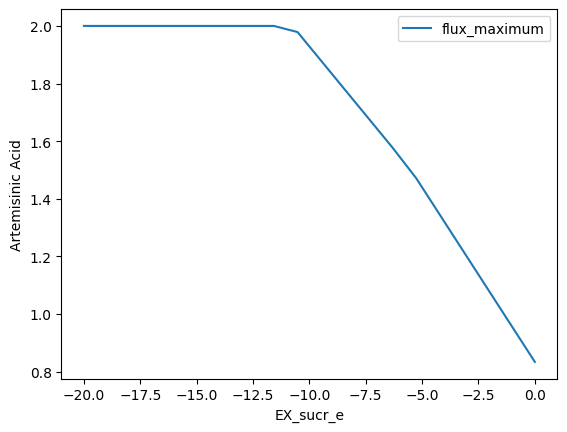

In [3]:
from PIL import Image
img3 = Image.open("Analysis\Pictures\Biomass_sucr.png")
display(img3)
from PIL import Image
img4= Image.open("Analysis\Pictures\AA_sucr.png")
display(img4)

# Pathway predictor 
Pathway predictor from the cameo package is a great tool to identify potential heterologous pathways across metabolic models for the production of established metabolites.
However a limitation arose when trying to predict our not well established metabolite, artemisinic acid. Here, the prediction software could not predict the heterologous pathway for the production of artemisinic acid due to the lack of a constructed metabolic model of Artemisia annua, which didn’t exist in either the BIGG database or in literature. For this reason it was chosen to predict pathways for the precursor farnesyl diphosphate(FPP) instead since it exists in multiple models and different heterologous pathways could potentially therefore be predicted.
When running pathway predictions for FPP it shows 4 pathways to get FPP.


TABEL

Since the first three pathways (see X) already exist in the model, we test whether the addition of a fourth pathway will result in an increase of productivity or biomass yield. This is because it may aid in the formation of more artemisinic acid due to farnesyl diphosphate being the precursor for the heterologous pathway. However, in 05_Predicted_Strain.ipynb it is shown that there is no difference in productivity or biomass yield for artemisinic acid when a fourth pathway is added. Therefore, due to the lack of difference in yield, we will not add it to our model as this is unnecessary and would also make the strain harder to design in vitro with no apparent benefits (according to our calculations).


 
# Knockouts 
The attempt to increase artemisinic acid production by knocking out genes responsible for metabolite removal using Optgene was unsuccessful. Optknock was considered as an alternative, but execution issues arose . Resorting to manual knockouts, a literature review identified HEX, SBTR, SBTD_D2, PGCD, PSP_L, ALATA_L, CITtcm, and ICDHxm as promising candidates, detailed in 06.3_Knockouts.ipynb (Sun et al., 2014). However, none of these single or double knockouts led to an increase in artemisinic acid production. In contrast, a manual knockout of the gene ATPM, identified through cobra.flux_analysis, resulted in a 0.03 mmol increase in artemisinic acid productivity per gram of dry weight per hour. This improvement is due to  ATPM being a futile reaction, consuming unnecessary ATP. Consequently, knocking out ATPM enhances productivity by making more ATP available (Sun et al., 2014).


<font size="5"> Regulation targerts </font>

A way to optimize a cell factory is to regulate the genes and to do that flux scanning has been done. Flux scanning is based on enforced objective flux (FSEOF), which enables it to identify gene amplification targets. FSEOF found 36 possible targets for gene regulation which are represented by a negative and a positive sign for flux decrease or increase. 
From the FSEOF analysis a top 15 list of upregulated target genes for artemisinic acid production is shown in the table below, table f.  
Table f shows the top 15 genes for upregulation from the gene regulation anaylsis. 






|Genes|Function|Reaction|
|:-:|:-:|:-:|
| SPMDtex2 | Spermidine excretion cytosol to extracellular | Spermidine _c ⇌ Spermidine _e |
|SPMDt3i| Spermidine transport in via proton antiport | H+_c + Spermidine_e ⇌ Spermidine_c + H+_e |
| PYRt2m | Pyruvate mitochondrial transport via proton symport | H+_c + pyruvat_c ⇌ H+_m + pyr_m |
| PDHm | Pyruvate dehydrogenase | CoA + NAD + pyruvat ⇌ Acetyl-CoA + co2 + nadh |
| HCO3E | HCO3 equilibration reaction | CO2 + H2O ⇌ H+ + HCO3**- |
| PC | Pyruvate carboxylase | ATP + HCO3- + Pyruvate ⇌ ADP +  H+ +  Oxaloacetate + phosphate |
| OAAt2m | Oxaloacetate transport mitochondrial | H+ + Oxaloacetate ⇌ H+ + Oxaloacetate |
| ACACT1m | Acetyl CoA C acetyltransferase mitochondrial | 2.0 Acetyl-CoA ⇌ Acetoacetyl-CoA + CoA |
| PMEVK | Phosphomevalonate kinase | ATP + (R)-5-phosphomevalonate⇌ ADP + (R)-5-Diphosphomevalonate |
| DPMVD | Diphosphomevalonate decarboxylase | ATP + (R)-5-diphosphomevalonate ⇌ ADP + phosphate + isopentenyl diphosphate + CO2 |
| COAtim | CoA transporter mitochondrial irreversible | CoA_c ⇌ CoA_m |
| MEVK1 | Mevalonate kinase atp | ATP + (R)-mevalonate ⇌ ADP + H+ + (R)-5-phosphomevalonate |
| GRTT | Geranyltranstransferase | Geranyl diphosphate + isopentenyl diphosphate ⇌ diphosphate + farnesyl diphosphate (also known as Farnesyl pyrophosphate (FPP)) |
| DMATT | Dimethylallyltranstransferase | Dimethylallyl diphosphate + Isopentenyl diphosphate ⇌ Geranyl diphosphate + diphosphate |
| IPDDI | Isopentenyl-diphosphate D-isomerase | Isopentenyl diphosphate ⇌ Dimethylallyl diphosphate |





The two first genes, seen in table f, of the up-regulation target code are involved in spermindine transport, however, we couldn’t find the impact of these on our cell factory. PYRt2m, PDHm, HCO3E, PC, OAAt2m, ACACT1m and COAtim are involved in increasing the flux to the mitochondria which increase production of Acetyl-CoA through TCA. This in turn increases flux to the mevalonate (MVA) isoprenoid biosynthesis. In this pathway the genes PMEVK, DPMVD, MEVK1, GRTT, DMATT and IPDDI are also targeted for up-regulation. This pathway produces farnesyl diphosphate (also known as Farnesyl pyrophosphate (FPP)), which is the precursor for the heterologous pathway inserted into the organism, so upregulation of these genes makes sense for increasing flux towards the heterologous pathway. 

# Cofactor Swap

In the biosynthesis of artemisia acid, the conversion of its precursor, artemisinic aldehyde, involves an enzymatic reaction where NAD(P) serves as a cofactor. 

ALDH1: Artemisinic aldehyde + NAD(P)+ → Artemisinic acid + NAD(P)H

Therefore it might be beneficial to swap cofactors [NAD(P), NAD(P)H] for [NAD, NADH] to increase the available pool of NAD(P), potentially enhancing its utilization in the conversion of artemisinic aldehyde instead. 
The cofactor swap analysis yielded 45 potential solutions involving cofactor swapping. Among these, one reaction, HMGCOAR, demonstrated the use of NAD(P) as a cofactor on the reaction site, allowing for a potential swap with NAD to augment the NAD(P) pool. Furthermore, two other reversible reactions, ALCD2x_copy2 and GAPD, utilized co-factors [NAD, NADH], implying the interchangeability of NADH for NAD, thereby contributing to the augmentation of the NAD(P) pool. While these reversible reactions offer a potential strategy for cofactor swapping to increase artemisinic acid production, it is important to note that the reactions are reversible so there is a possibility that the available NAD(P) needed for artemisinic acid synthesis could be utilized to produce NAD(P)H in an alternative reaction.


# Pathway Visualization 
We have constructed the relevant pathway by utilizing the central carbon metabolism map over the iMM904 yeast. Due to our choice of product we can only add the relevant reaction steps to the native precursor FPP. This is because the plant Artemisia annua which produces artemisinic acid does not have a metabolic map and its pathways are unique and can therefore not be imported from elsewhere. FPP is produced through the mevalonate pathway from acetyl-CoA. We have placed the most central steps in this process in the bottom right corner of the picture. 

<font size="5"> FBA </font>

Dynamic Flux Balance Analysis (dFBA) links a dynamic system's external cellular concentrations to a metabolic model that operates in a pseudo-steady state. 
To simulate a fermentation process using our strain the software dFBA is used.
The dfba package software could not be installed because the package failed to build a wheel, this environment problem could not be solved and therefore a FBA analysis was performed with the steps found in Dynamic Flux Balance Analysis (dFBA) in COBRApy under the documentation for COBRApy. https://cobrapy.readthedocs.io/en/latest/dfba.html 

The FBA code could not run when running with oxygen and it is seen in 10_dFBA_Oxygen.
Conducting the FBA analysis with sucrose reveals a correlation between the quantity of added sucrose and the resulting biomass production. Examining the graph presented in 10_dFBA_Sucrose, it becomes evident that as biomass increases, the sucrose level decreases. This observation aligns with expectations, as the carbon source is utilized in the production of biomass.

We decided to utilize GRTT for the FBA analysis due to the constraints preventing the analysis with artemisinic acid. The results showed a distinct relationship, revealing that as biomass levels increased, there was a corresponding increase in the production of frdp_c, also known as farnesyl pyrophosphate which is seen in 10_dFBA_GRTT.


<font size="5"> Regulation targerts </font>
<br>
To identify possible knockouts for improving the production of artemisinic acid we used Optgene and Optknock as well as single found from the litterature and double gene knockouts done with cobra flux analysis.   

<br><font size="3">The results of Optgene can be seen in file 06_optgene.ipynb and it shows that no knockouts can be made to increase prodution of artemisinic acid. Since running Optgene did not result in any knockouts Optknock is used. After running Optknock multiple times for 8000+ minuts and changing parameters mutiple times and still got no results, we decided to move on to manual knockouts such as single and double knockouts.
<br><font size="3"> Single knockouts </font>
<br>
The single knockouts  (HEX,SBTR,SBTD_D2,PGCD,PSP_L,ALATA_L,CITtcm,ICDHxm) was found from (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0112615) and they can be seen in 06.3_Knockouts.ipynb. The table below sumerises the single knockouts made.

|Genes|Maximum AA productivity|Maximum theoretical yield|
|:-:|:-:|:-:|
| HEX | 1.44 | 0.144 |
| SBTR | 1.44 | 0.144 |
| SBTD_D2 | 1.44 | 0.144 |
| PGCD | 1.44 | 0.144 |
| PSP_L | 1.44 | 0.144 |
| ALATA_L | 1.44 | 0.144 |
| CITtcm | 1.44 | 0.144 |
| ICDHxm | 1.44 | 0.144 |
| ATPM | 1.47 | 0.147 |

As seen all the single knocouts gotten from the litterature did not result in and increase in production of artesimic acid. However when using cobra.flux_analysis to identify possible single gene knockouts the gene ATPM showed an increase in artesimic aacid productivety when knockout. This it due to ATPM being a futile reaction consuming unesserary ATP, therfor when knocked out the productivety increases due to more ATP being avalible. 
<br>
<br><font size="3"> Double </font>
<br>

## 5. Discussion (<500 words)



Based on the memote analysis, iMM904 from S. cerevisiae emerged as the most suitable model for artemisinic acid production, the precursor of artemisinin, traditionally obtained from plants. This model was preferred due to its extensive metabolic coverage. The mapping of reaction steps, particularly up to the precursor FPP, was incorporated into the model, given that the metabolic map for the remaining components of the plant, Artemisia annua, was unavailable. Consequently, a partial prediction was made for FPP. While three out of the four predicted models were already present in the existing model, the inclusion of a fourth potential pathway did not result in an increase in biomass yield of artemisinic acid, and was therefore not added to the final model.

Various knockout strategies were attempted to enhance artemisinic acid production and it was revealed that the knockout of ATPM gene showed a slight improvement in artemisinic acid production upon the knockout of the.
Flux scanning for cell factory optimization highlighted 36 gene targets.  Up-regulation primarily amplifies flux to the mitochondria, enhancing Acetyl-CoA production.  This sequential boost activates mevalonate biosynthesis genes, also targeted for up-regulation, crucial for FPP production in the synthesis of artemisinic acid. The literature extensively explores the upregulation of enzymes in the MVA pathway, aligning with our findings. However, our results suggest that delving into the increased flux towards acetyl-CoA could be valuable. 

In artemisinic acid synthesis, converting its precursor, artemisinic aldehyde, requires NAD(P). To optimize NAD(P) availability, cofactor swapping was explored, suggesting the potential benefit of exchanging [NAD(P), NAD(P)H] for [NAD, NADH]. The analysis identified HMGCOAR as a potential solution for cofactor swapping. Two reversible reactions, ALCD2x_copy2 and GAPD, indicated the potential interchangeability of NADH for NAD, contributing to the NAD(P) pool. While this offers a potential strategy for increased artemisinic acid production, further analysis is necessary because of the reversibility of these reactions and the potential use of available NAD(P) for alternative pathways, such as NAD(P)H production.

Based on the phase plane analysis the carbon source sucrose  showed a higher artemisinic acid production. This is backed up by the analysis done for the media optimization revealing that sucrose resulted in a higher biomass production compared to glucose when in combination with yeast extract and peptone. 

The dFBA analysis demonstrated a correlation between the added sucrose amount and the subsequent biomass production. Additionally, it revealed a simultaneous increase in FPP production as the biomass increased.

The maximum theoretical yield is 0.0465 (mmol-AA * mmol-carbon-1). This translates to 0.000046 mol of artemisinic  being produced per carbon being consumed. The calculations can be found in Appendix 1 in the file 11_Appendix. The calculated profit is 97$ per 0.28$ spent, this does however not include many other costs. These include among other things, personal salary, cleaning, maintenance, time, purification and upstart of fermenters etc. Furthermore the calculations are done based on the maximum theoretical yield. It is therefore hard to determine whether the profit margins will be good or not. 

## 6. Conclusion (<200 words)

In conclusion, artemisinic acid production in S. cerevisiae has revealed iMM904 as a promising model that could potentially replace the reliance on Artemisia annua for the production of artemisinin for a malarial drug which could address the environmental concerns associated with plant cultivation, which consumes substantial space that could otherwise be utilized for essential agricultural purposes (Herrmann et al., 2013).

The knockout of the ATPM gene showed a slight improvement, emphasizing the potential of knockouts in enhancing artemisinic acid production. Additionally, three cofactor swap reactions were identified as potential targets to increase NAD(P) availability for artemisinic acid synthesis.

The regulation target analysis identified already established up-regulated gene targets important for artemisinic acid production, primarily genes in the MVA pathway. Additionally gene regulation targets were found that increase the production of acetyl-CoA, the precursor for MVA. 

There was a link between incorporating sucrose and the rise in biomass and FPP production, the precursor of artemisinic acid, thereby rendering it a more cost-effective option than utilizing glucose. However, the calculated profit margins raise uncertainties about the overall profitability of artemisinic acid production in S. cerevisiae. Further analysis is needed to address economic feasibility in the pharmaceutical industry, ensuring a sustainable and cost-effective alternative to traditional artemisinin sources.


## References

Arsenault, P.R., Wobbe, K.K. and Weathers, P.J. (2008) 'Recent advances in artemisinin production through heterologous expression,' Current Medicinal Chemistry, 15(27), pp. 2886–2896. https://doi.org/10.2174/092986708786242813.

Artemisinin Market (2024). https://www.reportsanddata.com/report-detail/artemisinin-market.

Artemisinin Market Size, Share, Trends & Forecast by 2031 (2023). https://www.businessresearchinsights.com/market-reports/artemisinin-market-100155.

Augustin, Y., Staines, H.M. and Krishna, S. (2020) 'Artemisinins as a novel anti-cancer therapy: Targeting a global cancer pandemic through drug repurposing,' Pharmacology & Therapeutics, 216, p. 107706. https://doi.org/10.1016/j.pharmthera.2020.107706.

Cui, L. and Su, X.-Z. (2009) 'Discovery, mechanisms of action and combination therapy of artemisinin,' Expert Review of Anti-infective Therapy, 7(8), pp. 999–1013. https://doi.org/10.1586/eri.09.68.

Duina, A.A., Miller, M.E. and Keeney, J.B. (2014) 'Budding Yeast for Budding Geneticists: A Primer on the Saccharomyces cerevisiae Model System,' Genetics, 197(1), pp. 33–48. https://doi.org/10.1534/genetics.114.163188.

Heavner, B.D. and Price, N.D. (2015) 'Comparative analysis of yeast metabolic network models highlights progress, opportunities for metabolic reconstruction,' PLOS Computational Biology, 11(11), p. e1004530. https://doi.org/10.1371/journal.pcbi.1004530.

Herrmann, S.D. et al. (2013) 'Distribution and ecological impact of artemisinin derived from Artemisia annua L. in an agricultural ecosystem,' Soil Biology & Biochemistry, 57, pp. 164–172. https://doi.org/10.1016/j.soilbio.2012.08.011.

Kavšček, M. et al. (2015) 'Yeast as a cell factory: current state and perspectives,' Microbial Cell Factories, 14(1). https://doi.org/10.1186/s12934-015-0281-x.

Kung, S.H. et al. (2018) 'Approaches and recent developments for the commercial production of semi-synthetic artemisinin,' Frontiers in Plant Science, 9. https://doi.org/10.3389/fpls.2018.00087.

Lenihan, J.R. et al. (2008) 'Developing an industrial artemisinic acid fermentation process to support the cost‐effective production of antimalarial artemisinin‐based combination therapies,' Biotechnology Progress, 24(5), pp. 1026–1032. https://doi.org/10.1002/btpr.27.

Liu, S. et al. (2022) 'Iron metabolism: State of the art in hypoxic cancer cell biology,' Archives of Biochemistry and Biophysics, 723, p. 109199. https://doi.org/10.1016/j.abb.2022.109199.

Ma, Z. et al. (2021) 'Repurposing Artemisinin and its Derivatives as Anticancer Drugs: A Chance or Challenge?,' Frontiers in Pharmacology, 12. https://doi.org/10.3389/fphar.2021.828856.

Mo, M.L., Palsson, B.Ø. and Herrgård, M.J. (2009) 'Connecting extracellular metabolomic measurements to intracellular flux states in yeast,' BMC Systems Biology, 3(1). https://doi.org/10.1186/1752-0509-3-37.

Paddon, C.J. et al. (2013) 'High-level semi-synthetic production of the potent antimalarial artemisinin,' Nature, 496(7446), pp. 528–532. https://doi.org/10.1038/nature12051.

Parapouli, M. et al. (2020) '<em>Saccharomyces cerevisiae</em> and its industrial applications,' AIMS Microbiology, 6(1), pp. 1–32. https://doi.org/10.3934/microbiol.2020001.

Sun, Z. et al. (2014) 'Identification of Novel Knockout Targets for Improving Terpenoids Biosynthesis in Saccharomyces cerevisiae,' PLOS ONE, 9(11), p. e112615. https://doi.org/10.1371/journal.pone.0112615.

Wang, J. et al. (2019) 'Artemisinin, the Magic Drug Discovered from Traditional Chinese Medicine,' Engineering, 5(1), pp. 32–39. https://doi.org/10.1016/j.eng.2018.11.011.

Wang, Z. et al. (2021) 'Recent advances in the biosynthesis of isoprenoids in engineered Saccharomyces cerevisiae,' in Advances in Applied Microbiology, pp. 1–35. https://doi.org/10.1016/bs.aambs.2020.11.001.

Weathers, P.J. et al. (2010) 'Artemisinin production in Artemisia annua: studies in planta and results of a novel delivery method for treating malaria and other neglected diseases,' Phytochemistry Reviews, 10(2), pp. 173–183. https://doi.org/10.1007/s11101-010-9166-0.

Weathers, P.J. et al. (2014) 'Pharmacokinetics of artemisinin delivered by oral consumption of Artemisia annua dried leaves in healthy vs. Plasmodium chabaudi-infected mice,' Journal of Ethnopharmacology, 153(3), pp. 732–736. https://doi.org/10.1016/j.jep.2014.03.037.

World Health Organization: WHO and World Health Organization: WHO (2023) Malaria. https://www.who.int/news-room/fact-sheets/detail/malaria.

Zhao, L. et al. (2022) 'From Plant to Yeast—Advances in Biosynthesis of Artemisinin,' Molecules, 27(20), p. 6888. https://doi.org/10.3390/molecules27206888.

Zomorrodi, A.R. and Maranas, C.D. (2010) 'Improving the iMM904 S. cerevisiae metabolic model using essentiality and synthetic lethality data,' BMC Systems Biology, 4(1). https://doi.org/10.1186/1752-0509-4-178.
